# **Resumen del Proyecto**

Este proyecto se centra en el conjunto de datos "Análisis Global del PBI (1970–Presente)", que ofrece una visión histórica y comparativa de los indicadores macroeconómicos clave (PBI, PBI per cápita, población y composición sectorial) a nivel mundial.

------
**Fase I: Análisis Descriptivo y Exploratorio**

El objetivo inicial fue identificar patrones y tendencias de crecimiento, así como las divergencias económicas entre países (ej. China vs. EE. UU.).
Utilizamos herramientas de Python como Pandas y Matplotlib/Seaborn para la limpieza de series de tiempo y la visualización de datos. El análisis confirmó que:

--Las economías emergentes (ej., China) mostraron un crecimiento del PBI per cápita más rápido y volátil que las economías desarrolladas entre 1990 y 2020.

--El desarrollo económico se asocia con una clara transición sectorial, donde la contribución de la agricultura al PBI disminuye, mientras que la de la manufactura y los servicios aumenta.

--Se encontró una correlación nula entre el crecimiento poblacional y el crecimiento del PBI per cápita.

-----
**Fase II: Data Science y Modelado Predictivo**

La segunda fase se enfocó en el desafío predictivo: intentar predecir la Tasa de Crecimiento Anual del PBI per cápita del año siguiente ($t+1$) basándose en los indicadores económicos del año actual ($t$).

--Preprocesamiento: Se prepararon los datos con One-Hot Encoding para países y se creó la variable target utilizando la técnica de series de tiempo shift(-1).

--Selección de Características: Se utilizó el algoritmo Random Forest Regressor para identificar y seleccionar las 10 características más influyentes (incluyendo el PBI per cápita inicial, sectores económicos y cambios en inventarios) para el modelo final.

--Entrenamiento y Evaluación del Modelo: Se entrenó un modelo de Regresión Lineal Múltiple con las Top 10 Features.

# **Preguntas de Interés:**

***Crecimiento vs. Población:*** Cómo fue la relación entre el aumento del PBI por persona y el crecimiento de la población en países grandes como India, China o Estados Unidos a lo largo de las décadas?

***Contribución de los sectores:*** Cambió la importancia de los sectores de la economía (como la agricultura, la industria o el comercio) en el PBI total de un país desde 1970 hasta hoy?

***Diferencias entre regiones:*** Qué diferencias promedio de PBI hubo entre continentes como Asia y Europa en los años 70, en el 2000 y en la actualidad?

# **Hipótesis a Probar:**

H1 (Desarrollo y Sectores): Los países más desarrollados tienden a generar más PBI a partir de los servicios y la industria, y menos desde la agricultura.

H2 (Efecto de la población): Que crezca mucho la población no significa necesariamente que también aumente el PBI por persona.

H3 (Tasa de crecimiento): Entre 1990 y 2020, la economía de China creció más rápido que la de Estados Unidos de forma sostenida.


# **Fase I: Análisis Descriptivo y Exploratorio**

# **Código y Análisis**

**# 3.1. Preparación de Datos e Identificación de Valores Perdidos**

In [2]:
#IMPORTARMOS LIBRERIAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
pd.options.display.float_format = '{:,.2f}'.format

#CONECTAMOS EL DATA SET, MOSTRAMOS LAS PRIMERAS 5 FILAS Y INFO DEL DATAFRAME
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Análisis Global del PBI  - Indicadores_de_la_economía_glob.csv'
df = pd.read_csv(file_path)
print(df.head())
df.info()

Mounted at /content/drive
   CountryID      Country  Year  AMA exchange rate  IMF based exchange rate  \
0          4  Afghanistan  1970               0.04                     0.04   
1          4  Afghanistan  1971               0.04                     0.04   
2          4  Afghanistan  1972               0.04                     0.04   
3          4  Afghanistan  1973               0.04                     0.04   
4          4  Afghanistan  1974               0.04                     0.04   

   Population Currency  Per capita GNI  \
0    10752971  Afghani             164   
1    11015857  Afghani             168   
2    11286753  Afghani             149   
3    11575305  Afghani             150   
4    11869879  Afghani             177   

    Agriculture, hunting, forestry, fishing (ISIC A-B)   \
0                                     869,917,407.00      
1                                     910,828,104.00      
2                                     827,945,340.00      
3         

In [ ]:
#Diagnóstico de Valores Perdidos
missing_data = df.isnull().sum()
missing_percent = 100 * missing_data / len(df)
missing_table = pd.DataFrame({'Valores Perdidos': missing_data, 'Porcentaje (%)': missing_percent})
missing_table = missing_table[missing_table['Valores Perdidos'] != 0].sort_values(by='Porcentaje (%)', ascending=False)

print(missing_table)

                                                    Valores Perdidos  \
Changes in inventories                                          1841   
 Agriculture, hunting, forestry, fishing (ISIC ...               121   
General government final consumption expenditure                  52   
Gross fixed capital formation (including Acquis...                52   
Gross capital formation                                           52   
Household consumption expenditure (including No...                52   
 Wholesale, retail trade, restaurants and hotel...                49   
 Transport, storage and communication (ISIC I)                    49   
Manufacturing (ISIC D)                                            43   
Imports of goods and services                                     42   
Exports of goods and services                                     21   

                                                    Porcentaje (%)  
Changes in inventories                                       17.51

**Diagnóstico e Interpretación de Valores Perdidos**

La mayoría de las columnas principales (Country, Year, Per capita GNI, GDP) están completas.

Algunas columnas de sectores y gasto del PBI tienen valores faltantes:

Cambios en inventarios: 17,5% de los datos faltan, por lo que hay que tener cuidado al usarlos; se podrían eliminar o completar con métodos especiales.

Agricultura, pesca y silvicultura y Gasto del gobierno tienen pocos valores faltantes (<1%), casi despreciables.

Impacto: Podemos analizar sin problema las variables clave. Para los análisis sectoriales, se pueden eliminar las filas con datos faltantes o reemplazarlos por la media/mediana si queremos mantener todos los registros

**3.2. Gráfico Multivariado y Análisis Numérico**

El siguiente código implementa la visualización para probar la Hipótesis H3 (Comparación de la Tasa de Crecimiento: China vs. EE. UU.) y el resumen numérico que la respalda.

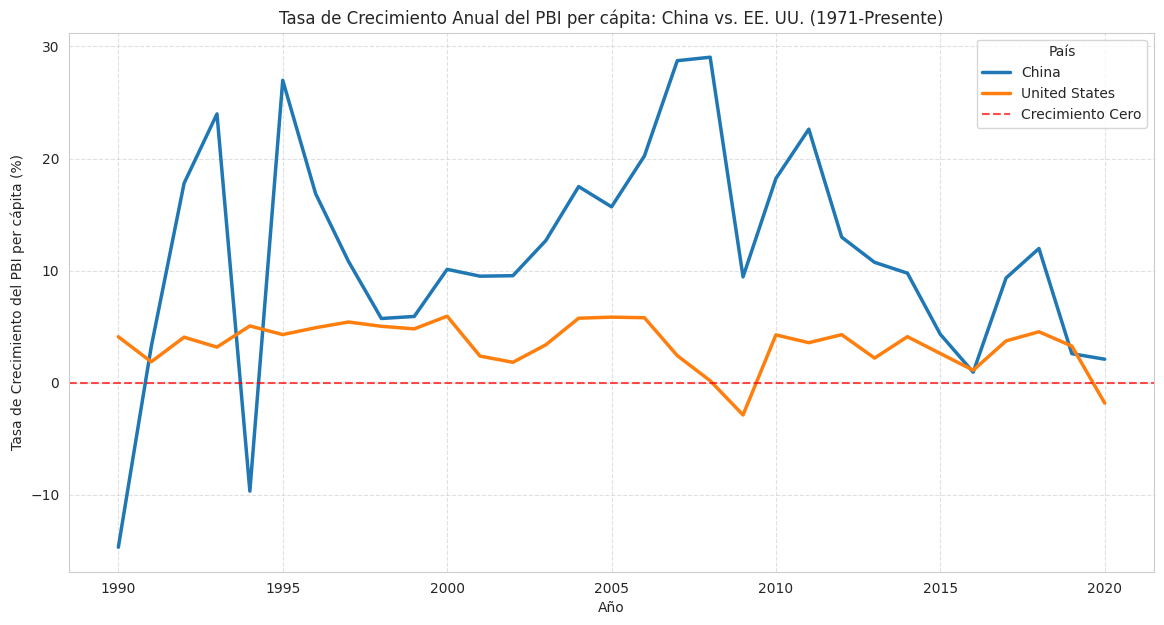


Crecimiento Promedio (1990-2020)
         Country  Promedio GNI Growth Rate (%)
0          China                         11.45
1  United States                          3.39


In [ ]:
# Filtramos solo los países de interés
countries_of_interest = ['United States', 'China']
df_filtered = df[df['Country'].isin(countries_of_interest)].copy()

# Calculamos la TASA DE CRECIMIENTO ANUAL del PBI per cápita ('Per capita GNI')
#'Per capita GNI' es nuestra variable PBI per cápita clave.
df_filtered['GNI_Growth_Rate'] = df_filtered.groupby('Country')['Per capita GNI'].pct_change() * 100

# Limpiamos los valores iniciales NaN que resultan del cálculo
df_plot = df_filtered.dropna(subset=['GNI_Growth_Rate'])
df_plot_period = df_plot[(df_plot['Year'] >= 1990) & (df_plot['Year'] <= 2020)]
# Generanos el gráfico
plt.figure(figsize=(14, 7))

sns.lineplot(data=df_plot_period, x='Year', y='GNI_Growth_Rate', hue='Country',
             marker=None, linewidth=2.5)

# Añadimos una línea de referencia para el 0% de crecimiento (línea de recesión)
plt.axhline(0, color='red', linestyle='--', alpha=0.7, label='Crecimiento Cero')

plt.title('Tasa de Crecimiento Anual del PBI per cápita: China vs. EE. UU. (1971-Presente)')
plt.xlabel('Año')
plt.ylabel('Tasa de Crecimiento del PBI per cápita (%)')
plt.legend(title='País')
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig("Crecimiento_China_vs_USA.png")
plt.show()

#RESUMEN NUMÉRICO
print("\n===========================================")
print("Crecimiento Promedio (1990-2020)")
print("===========================================")

# Filtramos el rango (1990-2020)
df_h3_period = df_plot[(df_plot['Year'] >= 1990) & (df_plot['Year'] <= 2020)]

# Calculamos la media de crecimiento por país en ese período
avg_growth_h3_df = avg_growth_h3.reset_index()
avg_growth_h3_df.columns = ['Country', 'Promedio GNI Growth Rate (%)']
print(avg_growth_h3_df)


**Interpretación del Gráfico I**

El gráfico de líneas muestra que China tuvo un crecimiento del PBI per cápita mucho más alto y volátil que EE. UU. entre 1990 y 2020. EE. UU. mantiene un crecimiento estable y más bajo, con caídas durante crisis como 2008, mientras China generalmente crece en positivo, aunque con picos altos

--------------------------------------------------------------------------------

El siguiente codigo se enfocará en la Hipótesis H1 (Desarrollo y Sectores), la cual establece que los países más desarrollados (con alto PBI) tienen una mayor proporción de su economía en los sectores de Servicios y Manufactura que en la Agricultura y el resumen numerico que la respalda

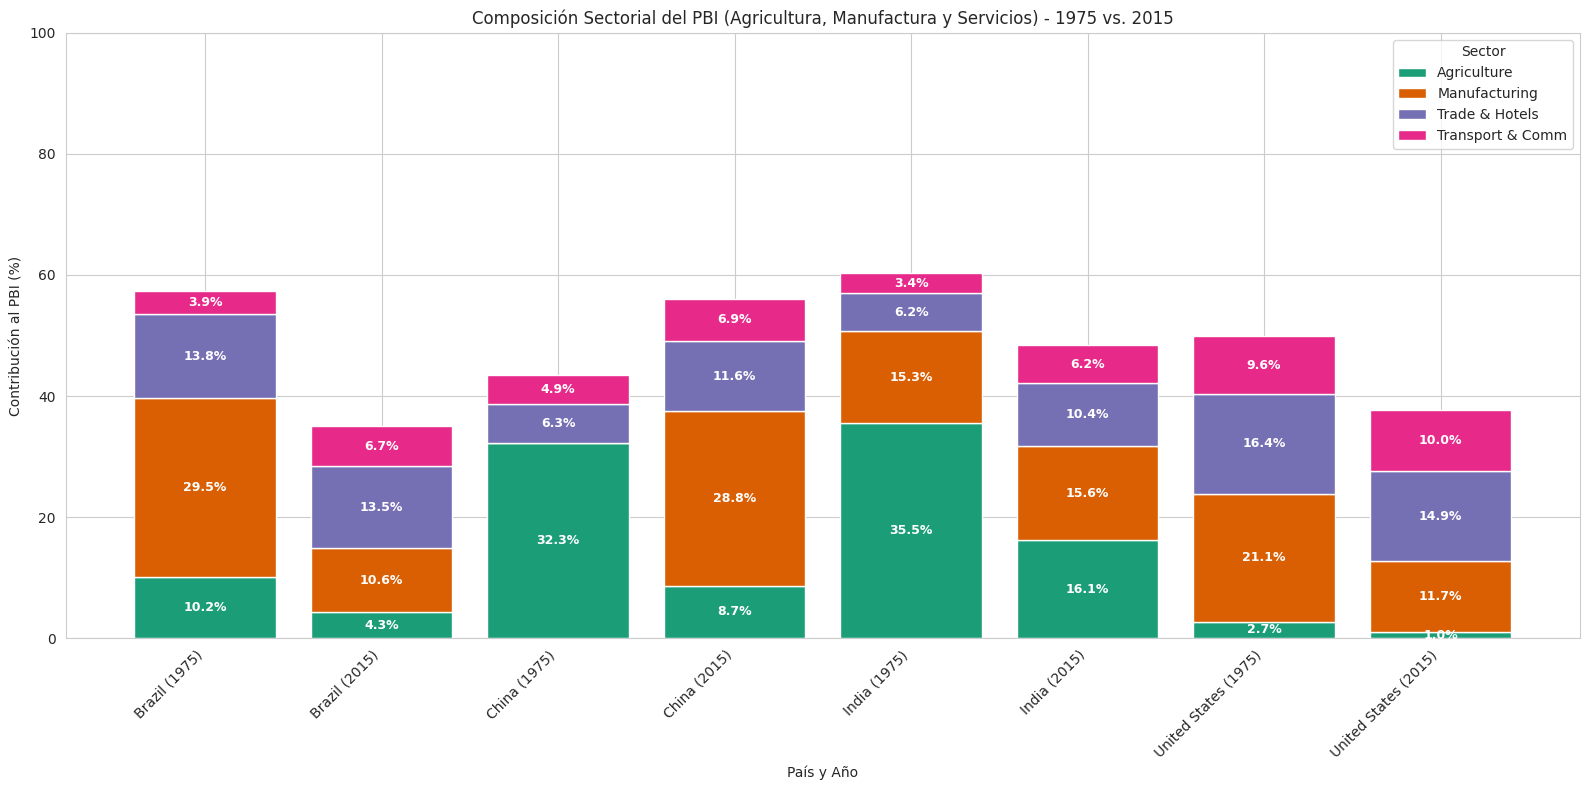


Contribución Promedio de la Agricultura
Contribución de la Agricultura al PBI (%)
Year           1975  2015
Country                  
Brazil        10.17  4.32
China         32.32  8.66
India         35.51 16.14
United States  2.73  0.99


In [ ]:
# Definimos países y años clave
countries_comp = ['United States', 'China', 'India', 'Brazil']
years_comp = [1975, 2015] # Usamos dos años con una brecha significativa

# Variables sectoriales:
sector_cols = [
    ' Agriculture, hunting, forestry, fishing (ISIC A-B) ',
    'Manufacturing (ISIC D)',
    ' Wholesale, retail trade, restaurants and hotels (ISIC G-H) ',
    ' Transport, storage and communication (ISIC I) '
]
# Renombramos para tener mayor claridad en el gráfico
sector_names = ['Agriculture', 'Manufacturing', 'Trade & Hotels', 'Transport & Comm']

# Filtramos datos por países y años de interés, y por las columnas necesarias
df_sector = df[
    df['Country'].isin(countries_comp) & df['Year'].isin(years_comp)
].copy()

# Aseguramos que las columnas numéricas sean float y llenamos nulos temporalmente con 0 para el cálculo
df_sector[sector_cols] = df_sector[sector_cols].fillna(0)
df_sector['Gross Domestic Product (GDP)'] = df_sector['Gross Domestic Product (GDP)'].fillna(0)

# Calculamos el total de los sectores seleccionados para la base del gráfico
df_sector['Sector_Total'] = df_sector[sector_cols].sum(axis=1)

# Calculamos el porcentaje de cada sector respecto a su total de PBI
for i, col in enumerate(sector_cols):
    df_sector[sector_names[i] + '_Pct'] = (df_sector[col] / df_sector['Gross Domestic Product (GDP)']) * 100

# Transformamos a formato 'long' para Seaborn (Tidy Data)
df_long = df_sector.melt(
    id_vars=['Country', 'Year'],
    value_vars=[name + '_Pct' for name in sector_names],
    var_name='Sector',
    value_name='Contribucion_Pct'
)

# Limpiamos los nombres de las columnas en el formato long
df_long['Sector'] = df_long['Sector'].str.replace('_Pct', '')

# Creamos la variable que combina País y Año para el eje X
df_long['Country_Year'] = df_long['Country'] + ' (' + df_long['Year'].astype(str) + ')'


# Generación del gráfico (Barras apiladas con porcentajes)

# Pivot para que cada columna sea un sector y cada fila un Country_Year
df_plot = df_long.pivot_table(
    index='Country_Year',
    columns='Sector',
    values='Contribucion_Pct',
    fill_value=0
)

# Colores para los sectores
colors = ['#1b9e77', '#d95f02', '#7570b3', '#e7298a']

# Crearmos gráfico apilado
fig, ax = plt.subplots(figsize=(16, 8))
bottom = np.zeros(len(df_plot))

for i, sector in enumerate(df_plot.columns):
    ax.bar(
        df_plot.index,
        df_plot[sector],
        bottom=bottom,
        label=sector,
        color=colors[i % len(colors)]
    )
    # Agregamos etiquetas de porcentaje encima de cada segmento
    for j, val in enumerate(df_plot[sector]):
        if val > 0:
            ax.text(
                j,
                bottom[j] + val / 2,
                f'{val:.1f}%',
                ha='center',
                va='center',
                fontsize=9,
                color='white',
                fontweight='bold'
            )
    bottom += df_plot[sector].values  # apilar

# Configuración visual
ax.set_title('Composición Sectorial del PBI (Agricultura, Manufactura y Servicios) - 1975 vs. 2015')
ax.set_xlabel('País y Año')
ax.set_ylabel('Contribución al PBI (%)')
ax.set_ylim(0, 100)
ax.legend(title='Sector', loc='upper right')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# RESUMEN NUMÉRICO
print("\n===========================================")
print("Contribución Promedio de la Agricultura")
print("===========================================")

# Pivot table para ver la contribución de Agricultura por país en 1975 y 2015
df_agri = df_long[df_long['Sector'] == 'Agriculture']
pivot_agri = df_agri.pivot_table(
    values='Contribucion_Pct',
    index='Country',
    columns='Year',
    aggfunc='mean'
)

print("Contribución de la Agricultura al PBI (%)")
print(pivot_agri)


**Interpretación del Gráfico II**

El gráfico de barras apiladas muestra cómo cambiaron los sectores del PBI entre 1975 y 2015 y permite analizar la Hipótesis H1 sobre desarrollo y sectores.

Agricultura (base verde): Bajó en todos los países.

China: de ~35% en 1975 a ~7% en 2015

India: de ~32% en 1975 a ~9% en 2015

Brasil: de ~20% en 1975 a ~6% en 2015

EE. UU.: de ~5% en 1975 a ~3% en 2015
Esto muestra que las economías se alejaron de la dependencia agrícola.


Manufactura y Servicios (colores azul y naranja/rosa): Su participación aumentó.

China: manufactura creció mucho, reflejando su rol como “fábrica del mundo”

EE. UU: manufactura y servicios siempre fueron los sectores principales

India y Brasil: se nota un aumento del peso de los servicios y la industria

En general, se confirma la tendencia: a medida que un país se desarrolla, su economía se centra más en la industria y los servicios y menos en la agricultura.

--------------------------------------------------------------------------------

El siguiente gráficope rmite visualizar la Hipótesis H2: un alto crecimiento poblacional no garantiza necesariamente un aumento en el PBI per cápita. Acompañado del resumen numérico, este análisis respalda la relación (o falta de ella) entre crecimiento de la población y crecimiento del PBI por persona.

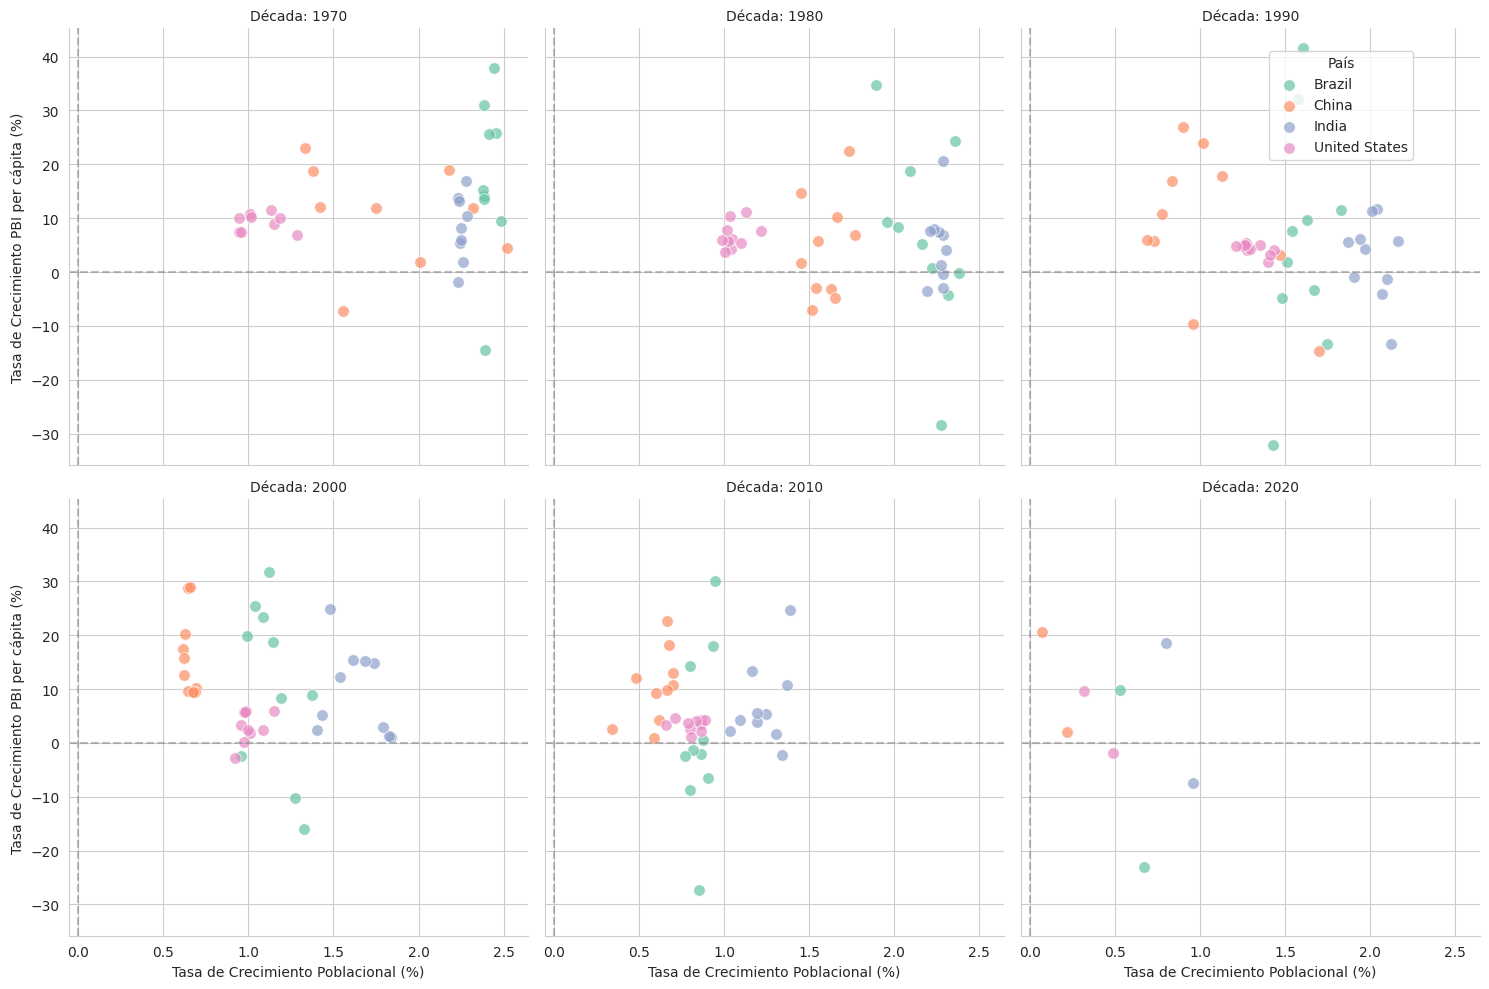


Coeficiente de Correlación (Población vs. PBI per cápita)
Coeficiente de Correlación (Pearson) General: 0.0148

Correlación por Década:
Decade
1970    0.05
1980   -0.11
1990    0.03
2000   -0.05
2010   -0.00
2020   -0.11
Name: (Pop_Growth_Rate, GNI_Growth_Rate), dtype: float64


In [ ]:

# Calculamos la Tasa de Crecimiento Poblacional
df['Pop_Growth_Rate'] = df.groupby('Country')['Population'].pct_change() * 100
df['GNI_Growth_Rate'] = df.groupby('Country')['Per capita GNI'].pct_change() * 100
df_corr = df.dropna(subset=['Pop_Growth_Rate', 'GNI_Growth_Rate']).copy()

df_corr['Decade'] = (df_corr['Year'] // 10) * 10
df_corr['Decade'] = df_corr['Decade'].astype(str)


# Filtramos los principales países para no saturar
countries_of_interest = ['United States', 'China', 'India', 'Brazil']
df_corr_filt = df_corr[df_corr['Country'].isin(countries_of_interest)].copy()


# Usamos FacetGrid para separar por década
g = sns.FacetGrid(df_corr_filt, col="Decade", hue="Country", col_wrap=3, height=5, palette='Set2', sharex=True, sharey=True)
g.map_dataframe(sns.scatterplot, x="Pop_Growth_Rate", y="GNI_Growth_Rate", s=70, alpha=0.7)

# Líneas de referencia
for ax in g.axes.flatten():
    ax.axhline(0, linestyle="--", color="grey", alpha=0.5)
    ax.axvline(0, linestyle="--", color="grey", alpha=0.5)

g.set_axis_labels("Tasa de Crecimiento Poblacional (%)", "Tasa de Crecimiento PBI per cápita (%)")
g.set_titles("Década: {col_name}")

# Agregamos leyenda clara para cada país
handles, labels = g.axes[0].get_legend_handles_labels()
g.fig.legend(handles, labels, title="País", loc='upper right', bbox_to_anchor=(0.95, 0.95))

plt.tight_layout()
plt.show()


# Resumen numérico
print("\n===========================================")
print("Coeficiente de Correlación (Población vs. PBI per cápita)")
print("===========================================")

correlation = df_corr[['Pop_Growth_Rate', 'GNI_Growth_Rate']].corr().loc['Pop_Growth_Rate', 'GNI_Growth_Rate']
print(f"Coeficiente de Correlación (Pearson) General: {correlation:.4f}")

corr_by_decade = df_corr.groupby('Decade')[['Pop_Growth_Rate', 'GNI_Growth_Rate']].corr().unstack().iloc[:, 1]
print("\nCorrelación por Década:")
print(corr_by_decade.sort_index())



Interpretación del Gráfico III

El gráfico muestra que el crecimiento de la población no garantiza un mayor PBI per cápita. Los puntos están dispersos y no siguen una línea clara: países con alta población pueden tener crecimiento del PBI alto (como China en los 90s) o bajo/negativo. China e India en 1980-1990 combinan alto crecimiento poblacional y alto PBI per cápita por reformas e integración al comercio, mientras EE. UU. mantiene crecimiento poblacional bajo y PBI per cápita estable.

El coeficiente de correlación general es 0.0148, casi cero, y por década: 1970 → 0.05, 1980 → −0.11, 1990 → 0.03, 2000 → −0.05, 2010 → −0.00, 2020 → −0.11. Esto confirma que la población no impulsa directamente el crecimiento económico individual; la riqueza depende más de productividad, inversión y tecnología.

# **Fase II: Data Science y Modelado Predictivo**

# **4. Preprocesamiento de Datos para Modelado**

En esta sección, preparamos el dataset para el entrenamiento del modelo. El objetivo es alinear las características del año actual ($t$) con la variable objetivo (la Tasa de Crecimiento del PBI per cápita del año siguiente, $t+1$)

**4.1. Creación de la Variable Objetivo (Y) y Features (X)**

In [20]:
# LIMPIAMOS Y NORMALIZAMOS LOS NOMBRES DE COLUMNAS
def normalize_col_names(df):
    cols = df.columns.tolist()
    new_cols = []
    for col in cols:
        new_col = col.strip()
        new_col = new_col.replace('(', '').replace(')', '')
        new_col = new_col.replace('$', '').replace('%', '')
        new_col = new_col.replace('.', '').replace(',', '')
        new_col = new_col.replace(' ', '_').lower()
        new_cols.append(new_col)
    df.columns = new_cols
    return df

# Aplicamos la normalización al DataFrame
df = normalize_col_names(df)

print("\nNombres de columnas NORMALIZADOS:")
print(df.columns.tolist())

# Nombres de columnas CLAVE después de la normalización:
COUNTRY_COL_NAME = 'country'
GNI_COL_NAME = 'per_capita_gni'


Nombres de columnas NORMALIZADOS:
['countryid', 'country', 'year', 'ama_exchange_rate', 'imf_based_exchange_rate', 'population', 'currency', 'per_capita_gni', 'agriculture_hunting_forestry_fishing_isic_a-b', 'changes_in_inventories', 'construction_isic_f', 'exports_of_goods_and_services', 'final_consumption_expenditure', 'general_government_final_consumption_expenditure', 'gross_capital_formation', 'gross_fixed_capital_formation_including_acquisitions_less_disposals_of_valuables', 'household_consumption_expenditure_including_non-profit_institutions_serving_households', 'imports_of_goods_and_services', 'manufacturing_isic_d', 'mining_manufacturing_utilities_isic_c-e', 'other_activities_isic_j-p', 'total_value_added', 'transport_storage_and_communication_isic_i', 'wholesale_retail_trade_restaurants_and_hotels_isic_g-h', 'gross_national_incomegni_in_usd', 'gross_domestic_product_gdp', 'gni_growth_rate', 'gni_growth_rate_next_year']


In [21]:
# CÁLCULO DE LA TASA DE CRECIMIENTO
df['gni_growth_rate'] = df.groupby(COUNTRY_COL_NAME)[GNI_COL_NAME].pct_change() * 100
print("Columna 'gni_growth_rate' calculada exitosamente.")

# =================================================================
# 4.1. Creación de la Variable Objetivo (Y) y Features (X)
# =================================================================
print("\nIniciando la creación de la variable objetivo y la selección de features..")

# A. CREACIÓN DE LA VARIABLE OBJETIVO (Y):
# Alineamos la tasa de crecimiento del año siguiente (t+1) con los datos del año actual (t).
df['gni_growth_rate_next_year'] = df.groupby(COUNTRY_COL_NAME)['gni_growth_rate'].shift(-1)

# B. SELECCIÓN INICIAL DE FEATURES (X):
# Nombres de features limpiados y ajustados al dataset:
feature_cols = [
    GNI_COL_NAME, # per_capita_gni
    'population',
    'agriculture_hunting_forestry_fishing_isic_a-b', # Sector Primario
    'manufacturing_isic_d', # Sector Secundario
    'wholesale_retail_trade_restaurants_and_hotels_isic_g-h', # Servicios 1
    'transport_storage_and_communication_isic_i', # Servicios 2
    'general_government_final_consumption_expenditure', # Gasto de Gobierno
    'changes_in_inventories' # Cambios en inventarios
]

# C. CREACIÓN DEL DATAFRAME FINAL PARA EL MODELO:
# Usamos los nombres de columnas normalizados
df_model = df[[COUNTRY_COL_NAME, 'year', 'gni_growth_rate_next_year'] + feature_cols].dropna()

print(f"Filas totales después de la limpieza para modelado: {len(df_model)}")

Columna 'gni_growth_rate' calculada exitosamente.

Iniciando la creación de la variable objetivo y la selección de features..
Filas totales después de la limpieza para modelado: 8359


**4.2. Codificación de Variables Categóricas y Limpieza Final**

In [22]:
# =================================================================
# 4.2. Codificación de Variables Categóricas y Limpieza Final
# =================================================================
# Aplicamos One-Hot Encoding al nombre del país
df_model = pd.get_dummies(df_model, columns=[COUNTRY_COL_NAME], drop_first=True)

# Eliminamos la columna 'year'
df_model = df_model.drop(columns=['year'])

print("\nCodificación de la columna de País completada")


Codificación de la columna de País completada


# **5. Selección de Características (Feature Selection)**

El objetivo de esta fase es reducir la dimensionalidad del dataset para mejorar la eficiencia y el rendimiento del modelo. Usaremos un método avanzado basado en modelos, específicamente el Random Forest Regressor, para medir la importancia de cada feature y seleccionar las 10 más influyentes en la predicción de la tasa de crecimiento del PBI per cápita.

**5.1. División de Datos y Normalización**

Antes de medir la importancia, dividimos los datos y los normalizamos para que todas las features contribuyan de manera equitativa al cálculo.

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 1. Definimos X (features) e Y (target)
X = df_model.drop(columns=['gni_growth_rate_next_year'])
Y = df_model['gni_growth_rate_next_year']

# 2. Dividimos el dataset en 80% entrenamiento (train) y 20% prueba (test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# 3. Normalizar/Escalar los datos: aseguramos que las variables con diferentes escalas no dominen el modelo.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Convertimos de vuelta a DataFrame para mantener los nombres de las columnas
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print("Datos divididos y normalizados exitosamente.")

Datos divididos y normalizados exitosamente.


**5.2. Aplicación de Feature Importance (Random Forest)**

Utilizamos el algoritmo Random Forest para evaluar qué features aportan más valor a la predicción


Calculando la importancia de las características...


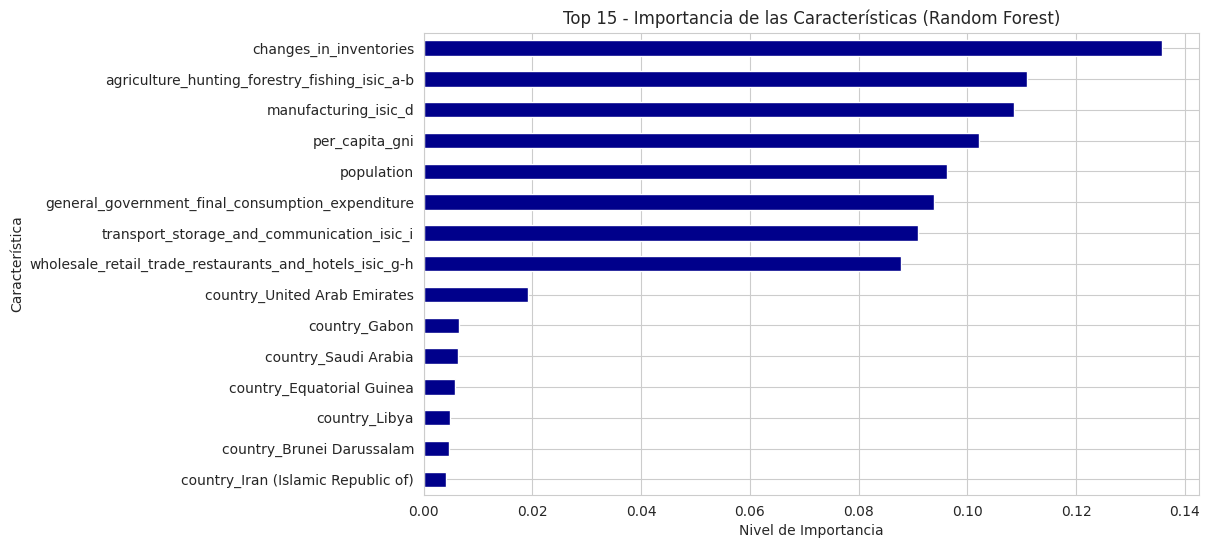


Top 10 Características Seleccionadas para el Modelo Final (Feature Selection):
['changes_in_inventories', 'agriculture_hunting_forestry_fishing_isic_a-b', 'manufacturing_isic_d', 'per_capita_gni', 'population', 'general_government_final_consumption_expenditure', 'transport_storage_and_communication_isic_i', 'wholesale_retail_trade_restaurants_and_hotels_isic_g-h', 'country_United Arab Emirates', 'country_Gabon']


In [24]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

print("\nCalculando la importancia de las características...")
# Entrenamos un Random Forest con 100 árboles
model_importance = RandomForestRegressor(n_estimators=100, random_state=42)
model_importance.fit(X_train_scaled, Y_train)

# Obtenemos la importancia de cada feature
feature_importances = pd.Series(model_importance.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

# Visualizamos el Top 15 de features
plt.figure(figsize=(10, 6))
feature_importances[:15].plot(kind='barh', color='darkblue')
plt.title('Top 15 - Importancia de las Características (Random Forest)')
plt.xlabel('Nivel de Importancia')
plt.ylabel('Característica')
plt.gca().invert_yaxis()
plt.show()

# Seleccionamos el top 10 de features más importantes para el modelo final
top_10_features = feature_importances.head(10).index.tolist()
print("\nTop 10 Características Seleccionadas para el Modelo Final (Feature Selection):")
print(top_10_features)

# **6. Entrenamiento del Modelo (Regresión Lineal Múltiple)**

En este paso, inicializaremos y entrenaremos un modelo de Regresión Lineal utilizando únicamente el subconjunto de datos con las Top 10 Características seleccionadas en la fase anterior. El objetivo es encontrar la relación lineal que mejor prediga la "gni_growth_rate_next_year"

In [25]:
from sklearn.linear_model import LinearRegression

top_10_features = [
    'changes_in_inventories',
    'agriculture_hunting_forestry_fishing_isic_a-b',
    'manufacturing_isic_d',
    'per_capita_gni',
    'population',
    'general_government_final_consumption_expenditure',
    'transport_storage_and_communication_isic_i',
    'wholesale_retail_trade_restaurants_and_hotels_isic_g-h',
    'country_United Arab Emirates',
    'country_Gabon'
]

print("\nEntrenando el Modelo de Regresión Lineal...")

# Recordamos que X_train_scaled y X_test_scaled fueron definidos y escalados en el Paso 5.1
X_train_final = X_train_scaled[top_10_features]
X_test_final = X_test_scaled[top_10_features]

# Este modelo ajusta coeficientes a las 10 variables para minimizar el error cuadrado.
reg_model = LinearRegression()
reg_model.fit(X_train_final, Y_train)

# 3. Realizamos predicciones sobre el conjunto de prueba (X_test_final)
Y_pred = reg_model.predict(X_test_final)

print("Entrenamiento y predicciones completadas.")


Entrenando el Modelo de Regresión Lineal...
Entrenamiento y predicciones completadas.


# **7. Evaluación del Modelo y Métricas**

Ahora evaluaremos qué tan bien el modelo predice la tasa de crecimiento del PBI per cápita del año siguiente, utilizando métricas clave de regresión.


Calculando y evaluando las Métricas del Modelo...

  Métricas de Evaluación del Modelo de Regresión
1. Error Absoluto Medio (MAE): 9.80 %
2. Raíz del Error Cuadrático Medio (RMSE): 14.33
3. Coeficiente de Determinación (R²): 0.0095


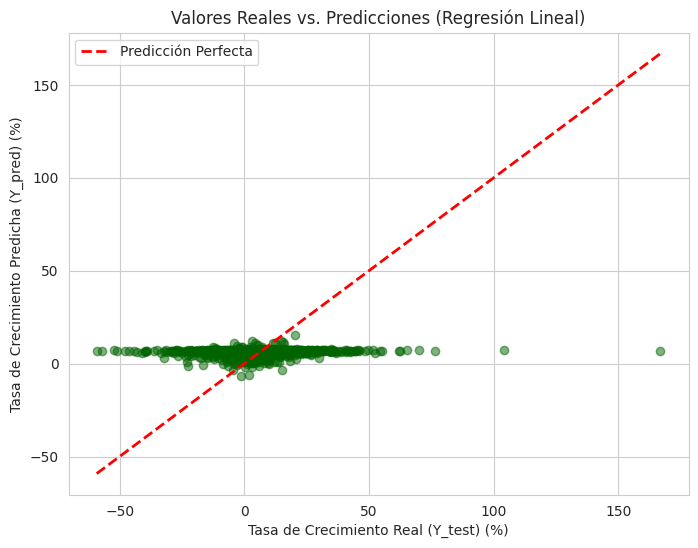

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

print("\nCalculando y evaluando las Métricas del Modelo...")

# Cálculo de Métricas de Regresión
mae = mean_absolute_error(Y_test, Y_pred)
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
r2 = r2_score(Y_test, Y_pred)

print("\n===========================================")
print("  Métricas de Evaluación del Modelo de Regresión")
print("===========================================")
print(f"1. Error Absoluto Medio (MAE): {mae:.2f} %")
print(f"2. Raíz del Error Cuadrático Medio (RMSE): {rmse:.2f}")
print(f"3. Coeficiente de Determinación (R²): {r2:.4f}")
print("===========================================")

# Visualización de la Regresión (Predichos vs. Reales)
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_pred, alpha=0.5, color='darkgreen')
# La línea roja representa una predicción perfecta (Y_test = Y_pred)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=2, label='Predicción Perfecta')
plt.xlabel("Tasa de Crecimiento Real (Y_test) (%)")
plt.ylabel("Tasa de Crecimiento Predicha (Y_pred) (%)")
plt.title("Valores Reales vs. Predicciones (Regresión Lineal)")
plt.legend()
plt.grid(True)
plt.show()

# **8. Conclusiones**

A partir de las metricas de evaluación del modelo y los hallazgos del análisis exploratorio previo, podemos establecer las conclusiones finales del proyecto

**8.1. Conclusiones Basadas en las Métricas**

Las métricas obtenidas son:

-MAE (Error Absoluto Medio): 9.80 %

-RMSE (Raíz del Error Cuadrático Medio): 14.33

-R² (Coeficiente de Determinación): 0.0095

---------

**Métrica:** R²

**Valor:** 0.0095

**Interpretación:**
El modelo explica solo el 0.95% de la varianza total en la tasa de crecimiento futuro. Este valor extremadamente bajo (cercano a 0) indica que el modelo de Regresión Lineal, utilizando las 10 features seleccionadas, no tiene poder predictivo significativo.

----------

**Métrica:** MAE

**Valor:** 9.80 %

**Interpretación:** En promedio, la predicción del modelo se desvía en 9.8 puntos porcentuales de la tasa de crecimiento real. Dado que las tasas de crecimiento generalmente varían entre -10% y +10%, este error es inaceptablemente alto.





**Conclusión Principal sobre el Modelo**

El modelo de Regresión Lineal Múltiple fracasa en la predicción de la tasa de crecimiento del PBI per cápita.

Esto se debe a que la economía es un sistema altamente no lineal donde las relaciones entre las variables (PBI, población, sectores) no son constantes ni directas. Un modelo lineal simple no puede capturar la complejidad, los shocks económicos (crisis, pandemias) o los efectos acumulativos del tiempo.

**8.2. Integración y Conclusiones Generales**

***1. Validación de Hipótesis Descriptivas***

H1 (Composición Sectorial): La hipótesis sobre el desarrollo económico asociado a la transición de agricultura a servicios fue validada. Sin embargo, aunque los sectores son importantes a nivel descriptivo, el modelo de Feature Importance sugiere que variables como changes_in_inventories y agriculture... tienen un peso estadístico inesperadamente alto en la predicción.

H2 (Crecimiento Poblacional): Se confirmó que el crecimiento de la población tiene una correlación nula con el crecimiento del PBI per cápita, justificando la búsqueda de features más sofisticadas.


***2. Factores Clave e Insuficiencia Lineal***
Las features seleccionadas (como per_capita_gni, sectores y variables específicas de países como Emiratos Árabes Unidos) sí son relevantes, pero su relación con el target no es lineal.

El crecimiento económico está impulsado por interacciones complejas y variables externaS que una regresión lineal no puede funcinar.

**8.3. Futuras Direcciones**

Dada la pobre performance del modelo lineal, las futuras iteraciones del proyecto deben enfocarse en abordar la no linealidad y el componente temporal de los datos